In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b
#print(x)

    Midterm mark  Final mark
0           32.5        31.7
1           53.4        68.8
2           61.5        62.6
3           47.5        71.5
4           59.8        87.2
..           ...         ...
95          50.0        81.5
96          49.2        72.1
97          50.0        85.2
98          48.1        66.2
99          25.1        53.5

[100 rows x 2 columns]


In [2]:
average_midterm = data['Midterm mark'].mean()
average_final = data['Final mark'].mean()

mid_standard = data['Midterm mark'].std()
final_standard = data['Final mark'].std()

print("Standard Deviation for Midterm Marks: ", mid_standard)
print("Standard Deviation for Final Marks: ",final_standard)

print("\nAverage for the Midterm: ", average_midterm)
print("Average for the Final: ",average_final)

Standard Deviation for Midterm Marks:  9.746494785617061
Standard Deviation for Final Marks:  16.658248631676365

Average for the Midterm:  48.959
Average for the Final:  72.735


In [3]:
#Standardizing X and Y (Midterm and Final Respectively)
x_std = (data['Midterm mark'] - average_midterm)/mid_standard
y_std = (data['Final mark'] - average_final)/final_standard
print(x_std)
print("\n")
print(y_std)

0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64


0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64


In [4]:
def cost_error_function(y_actual, y_predict):
    """
    Calculates the mean squared error between the true values and the predicted values.

    Arguments:
    y_actual -- numpy array or pandas Series, true values
    y_predict -- numpy array or pandas Series, predicted values

    Returns:
    error -- float, mean squared error
    """
    error = np.mean((y_actual - y_predict) ** 2)
    return error


# Assuming you have already trained your linear regression model and obtained the predicted values
# Let's say the true final marks are stored in `y_actual` and the predicted final marks are stored in `y_predict`

y_actual = y_std
y_predict = m * x_std + b  ### Example of predicted values using your existing implementation

error = cost_error_function(y_actual, y_predict)
print("Error (Cost Function): ", error)

Error (Cost Function):  2.0032433621324923


In [5]:
#Gradient Partial Derivatives:
dm = (2 / len(x_std)) * np.sum((y_predict  - y_std) * x_std)
db = (2 / len(x_std)) * np.sum((y_predict  - y_std))

print("Gradient Partial Derivative of m: ", dm)
print("\nGradient Partial Derivative of b: ", db)

Gradient Partial Derivative of m:  -2.521486724264985

Gradient Partial Derivative of b:  2.486899575160351e-16


In [6]:
# Alpha
learning_rate = 0.0001

# Updating of values of m and b using gradient descent using Alpha
m = m - learning_rate * dm
b = b - learning_rate * db

print("m after updating with the learning rate: ", m)
print("\nb after updating with the learning rate: ", b)

m after updating with the learning rate:  -0.4997478513275735

b after updating with the learning rate:  -2.486899575160351e-20


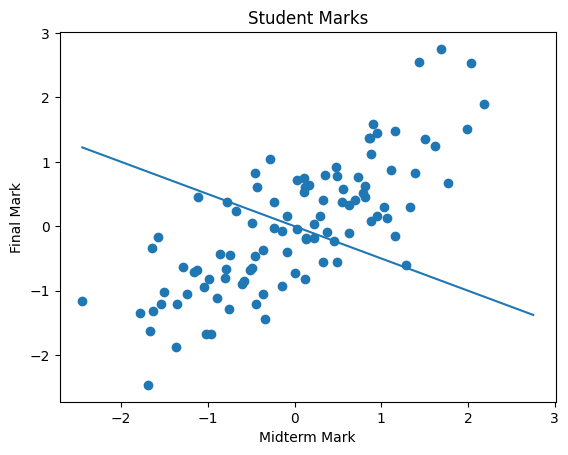

In [7]:
plt.scatter(x_std, y_std)  #, label='Data Points')

# Generate x values for the regression line
x = np.linspace(min(x_std), max(y_std), 100)

# Calculate the corresponding y values for the regression line
y = -0.5 * x

# Plot the regression line
plt.plot(x, y) #, color='red', label='Initial Regression Line')

plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.title('Student Marks')
#plt.legend()
plt.show()

m after updating with the learning rate:  -0.47478346812862643

b after updating with the learning rate:  -2.5321966745650572e-18 



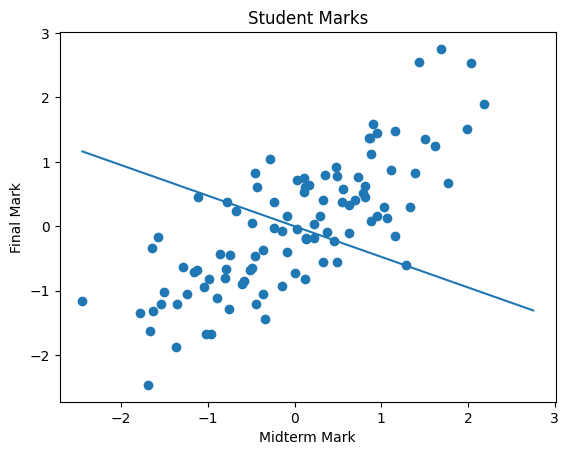

In [8]:
#sets the number of iteration
num_iterations = 100
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_predict  = m * x_std + b

    dm = (2 / len(x_std)) * np.sum((y_predict  - y_std) * x_std)
    db = (2 / len(x_std)) * np.sum((y_predict  - y_std))

    m = m - learning_rate * dm
    b = b - learning_rate * db

plt.scatter(x_std, y_std)#, label = 'Data points')
x = np.linspace(min(x_std), max(y_std), 100)
y = m*x+b
plt.plot(x, y) #, color = 'red', label = 'Updated Regression Model with 100 iterations')

print("m after updating with the learning rate: ", m)
print("\nb after updating with the learning rate: ", b,"\n")

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
#plt.legend()
plt.show()

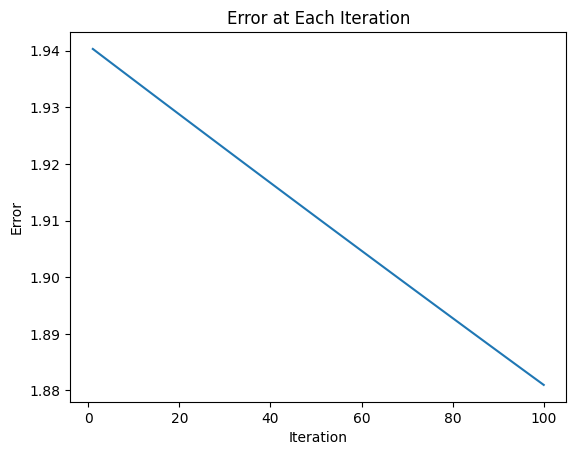

In [9]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_predict  = m * x_std + b

    # Calculate the mean squared error
    error = np.mean((y_predict  - y_std) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(x_std)) * np.sum((y_predict  - y_std) * x_std)
    db = (2 / len(x_std)) * np.sum(y_predict  - y_std)

    # Update m and b using gradient descent
    m = m - learning_rate * dm
    b = b - learning_rate * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

m after updating with the learning rate:  -0.050106213888014464

b after updating with the learning rate:  -2.1378010472972177e-17 



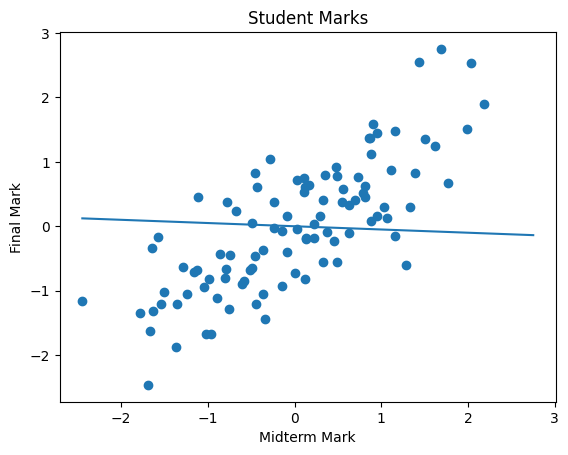

In [10]:
#sets the number of iteration
num_iterations = 2000
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_predict  = m * x_std + b

    #derivatives
    dm = (2 / len(x_std)) * np.sum((y_predict  - y_std) * x_std)
    db = (2 / len(x_std)) * np.sum(y_predict  - y_std)

    #updating m and b
    m = m - learning_rate * dm
    b = b - learning_rate * db
#plotting
plt.scatter(x_std, y_std) #, label = 'Data points')
x = np.linspace(min(x_std), max(y_std), 2000)
y = m*x+b
plt.plot(x, y) #, color = 'red', label = 'Updated Regression Model')

print("m after updating with the learning rate: ", m)
print("\nb after updating with the learning rate: ", b,"\n")

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
#plt.legend()
plt.show()

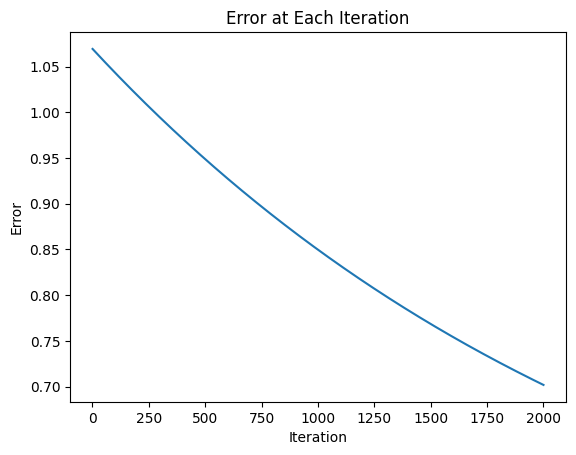

In [11]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_predict  = m * x_std + b

    # Calculate the mean squared error
    error = np.mean((y_predict  - y_std) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(x_std)) * np.sum((y_predict  - y_std) * x_std)
    db = (2 / len(x_std)) * np.sum(y_predict  - y_std)

    # Update m and b using gradient descent
    m = m - learning_rate * dm
    b = b - learning_rate * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

#**Linear Regression using Non-Standardized Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
print(data)

midterm_marks = data['Midterm mark']
final_marks = data['Final mark']

m = -0.5
b = 0
x = np.linspace(25,71,100)
y = m*x+b

average_midterm = data['Midterm mark'].mean()
average_final = data['Final mark'].mean()

mid_standard = data['Midterm mark'].std()
final_standard = data['Final mark'].std()

print("\nStandard Deviation for Midterm Marks: ", mid_standard)
print("Standard Deviation for Final Marks: ",average_final)

print("\nAverage for the Midterm: ", average_midterm)
print("Average for the Final: ",average_final)

In [ ]:
def cost_error_function(y_actual, y_predict ):
    """
    Calculates the mean squared error between the true values and the predicted values.

    Arguments:
    y_actual -- numpy array or pandas Series, true values
    y_predict  -- numpy array or pandas Series, predicted values

    Returns:
    error -- float, mean squared error
    """
    error = np.mean((y_actual - y_predict) ** 2)
    return error


# Assuming you have already trained your linear regression model and obtained the predicted values
# Let's say the true final marks are stored in `y_actual` and the predicted final marks are stored in `y_predict`

y_actual = final_marks
y_predict = m * midterm_marks + b  # Example of predicted values using your existing implementation

error = cost_error_function(y_actual, y_predict )
print("Error (Cost Function): ", error)

In [ ]:
dm = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks) * midterm_marks)
db = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks))

print("Gradient Partial Derivative of m: ", dm)
print("\nGradient Partial Derivative of b: ", db)

In [ ]:
#sets the number of iteration
num_iterations = 100
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_predict  = m * midterm_marks + b

    dm = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks))

    m = m - learning_rate * dm
    b = b - learning_rate * db

plt.scatter(midterm_marks, final_marks) #, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 100)
y = m*x+b
plt.plot(x, y) #, color = 'red', label = 'Updated Regression Model with 100 iterations')

print("m after updating with the learning rate: ", m)
print("\nb after updating with the learning rate: ", b,"\n")

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
#plt.legend()
plt.show()

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_predict  = m * midterm_marks + b

    # Calculate the mean squared error
    error = np.mean((y_predict  - final_marks) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predict  - final_marks)

    # Update m and b using gradient descent
    m = m - learning_rate * dm
    b = b - learning_rate * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()

In [ ]:
#sets the number of iteration
num_iterations = 2000
#looping gradient descent algorithm
for _ in range(num_iterations):
    #Predicted value calculations
    y_predict  = m * midterm_marks + b

    #derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predict  - final_marks)

    #updating m and b
    m = m - learning_rate * dm
    b = b - learning_rate * db
#plotting
plt.scatter(midterm_marks, final_marks) #, label = 'Data points')
x = np.linspace(min(midterm_marks), max(final_marks), 2000)
y = m*x+b
plt.plot(x, y) #, color = 'red', label = 'Updated Regression Model')

print("m after updating with the learning rate: ", m)
print("\nb after updating with the learning rate: ", b,"\n")

plt.xlabel("Midterm Mark")
plt.ylabel('Final Mark')
plt.title('Student Marks')
#plt.legend()
plt.show()

In [ ]:
# Initialize an array to store the error at each iteration
errors = []


# Perform gradient descent for the specified number of iterations
for iteration in range(num_iterations):
    # Calculate the predicted values based on the current m and b
    y_predict  = m * midterm_marks + b

    # Calculate the mean squared error
    error = np.mean((y_predict  - final_marks) ** 2)
    errors.append(error)

    # Calculate the gradient partial derivatives
    dm = (2 / len(midterm_marks)) * np.sum((y_predict  - final_marks) * midterm_marks)
    db = (2 / len(midterm_marks)) * np.sum(y_predict  - final_marks)

    # Update m and b using gradient descent
    m = m - learning_rate * dm
    b = b - learning_rate * db

# Plot the error at each iteration
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error at Each Iteration')
plt.show()